# Imports

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



# Load Data

In [ ]:
digits = load_digits()
type(digits)

sklearn.utils.Bunch

# Understand Data

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
print(type( digits.data))
print(type( digits.target))

print("Image Data Shape", digits.data.shape) 
print("Label Data Shape", digits.target.shape)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


numpy.ndarray

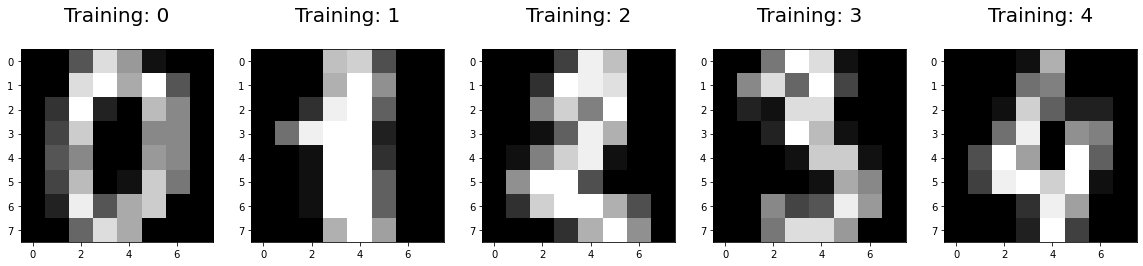

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate (zip (digits.data[0:5], digits.target [0:5])): 
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 0)

# test_size = .2 => test dataset is 20% of actual data set

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1437, 64)
(1437,)
(360, 64)
(360,)



regressor = LogisticRegression() <br>
regressor.fit(X_train, y_train)

### Problem
 ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  
  
  
### Solution
The warning message indicates that the logistic regression model did not converge within the specified maximum number of iterations. This can happen when the optimization algorithm used by logistic regression (in this case, the 'lbfgs' solver) reaches the maximum number of iterations without finding the optimal solution.

To address this, you can consider the following options:

##### 1.Increase max_iter:

One straightforward solution is to increase the max_iter parameter when creating the LogisticRegression object. This parameter represents the maximum number of iterations for the solver to converge.

regressor = LogisticRegression(max_iter=1000) <br>
regressor.fit(X_train_scaled, y_train)

##### 2.Scale the Data:

Logistic regression can be sensitive to the scale of the input features. Scaling the data can sometimes help the optimization process converge more easily.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() <br>
X_train_scaled = scaler.fit_transform(X_train)

regressor = LogisticRegression() <br>
regressor.fit(X_train_scaled, y_train)

##### 3.Use a Different Solver:

You can try using a different solver by specifying the solver parameter. For example, you can use 'liblinear' or 'sag' as alternative solvers.

regressor = LogisticRegression(solver='liblinear', max_iter=1000) <br>
regressor.fit(X_train, y_train)


# Create and train model

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=2000)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
print(X_test[0].shape, " \n")
print(X_test[0], " \n \n")
print(X_test[0].reshape(1,-1).shape, " \n")
print(X_test[0].reshape(1,-1))


(64,)  

[ 0.  0. 11. 16. 15.  3.  0.  0.  0.  5. 16. 12. 11. 13.  0.  0.  0.  3.
 13.  1.  5. 15.  0.  0.  0.  0.  0.  0. 12. 11.  0.  0.  0.  0.  0.  1.
 16.  7.  0.  0.  0.  0.  0. 10. 15.  0.  0.  0.  0.  0. 12. 16. 16. 11.
  1.  0.  0.  0. 13. 13.  8. 13. 16.  8.]  
 

(1, 64)  

[[ 0.  0. 11. 16. 15.  3.  0.  0.  0.  5. 16. 12. 11. 13.  0.  0.  0.  3.
  13.  1.  5. 15.  0.  0.  0.  0.  0.  0. 12. 11.  0.  0.  0.  0.  0.  1.
  16.  7.  0.  0.  0.  0.  0. 10. 15.  0.  0.  0.  0.  0. 12. 16. 16. 11.
   1.  0.  0.  0. 13. 13.  8. 13. 16.  8.]]


In [ ]:
print(regressor.predict(X_test[0].reshape(1,-1)))
print(regressor.predict(X_test[3].reshape(1,-1)))
print(regressor.predict(X_test[0:10]))

[2]
[6]
[2 8 2 6 6 7 1 9 8 5]


# Prediction

In [ ]:
prediction = regressor.predict(X_test)
print(prediction)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


# Metrics

In [ ]:
# Accuracy of the model is 95%

score = regressor.score(X_test, y_test)
print(score)

0.9583333333333334


In [ ]:
con_matrix = metrics.confusion_matrix(y_test, prediction) 
print(con_matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 39]]


In [ ]:
total_sum = np.sum(con_matrix)
print(total_sum)

360


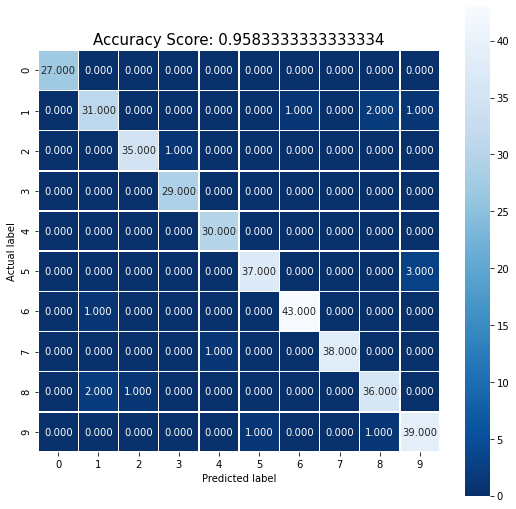

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


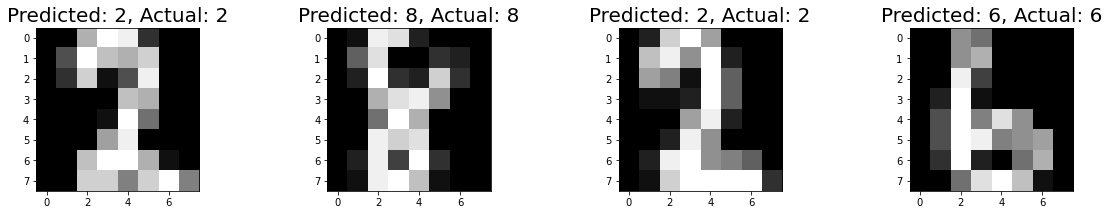

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip (prediction, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate (classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(X_test [wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(prediction[wrong], y_test[wrong]), fontsize=20)